<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/IBApi_Historical_T_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('/content/drive/MyDrive/TWS/M2K20201219_to_20201224131500.pkl')

In [3]:
df["Time"] = pd.to_datetime(df["time"], format='%Y%m%d  %H:%M:%S', yearfirst=True)

In [4]:
df.drop('time', axis=1, inplace=True)

In [5]:
df["Hour"] = pd.DatetimeIndex(df["Time"]).hour
df["Minute"] = pd.DatetimeIndex(df["Time"]).minute
df["Second"] = pd.DatetimeIndex(df["Time"]).second
df["Day"] = pd.DatetimeIndex(df["Time"]).day

In [6]:
initialDateTime = df.Time[0]
initialDateTime

Timestamp('2020-12-17 18:00:00')

In [7]:
df["TradeDay"] = pd.TimedeltaIndex(df.Time - initialDateTime).days

In [8]:
 


df["dev"] = df.close - df.open
df["jump"] = df.high - df.low
df["up"] = df.dev > 5
df["down"] = df.dev < -5 


 

In [9]:
df = df[df.jump.ne(0.0)]

In [10]:
df["stdv"] = df.dev.rolling(window=60, min_periods=1).std()
df["mu"] = df.dev.ne(0).rolling(window=60, min_periods=1).mean()
df["t"] = (df.dev - df.mu) / df.stdv

In [32]:
df["pf10sec"] = (df.avg.shift(-2)-df.avg).fillna(0.0)
df["pf30sec"] = (df.avg.shift(-6)-df.avg).fillna(0.0)
df["pfmin"] = (df.avg.shift(-12)-df.avg).fillna(0.0)
df.head()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,dev,jump,up,down,stdv,mu,t,pf10sec,pf30sec,pfmin
0,1976.1,1976.1,1974.5,1974.8,1975.14,19,2020-12-17 18:00:00,18,0,0,17,0,-1.3,1.6,False,False,NaN,1.000000,NaN,-0.57,-1.11,-1.16
1,1974.7,1975.0,1974.7,1974.8,1974.80,5,2020-12-17 18:00:05,18,0,5,17,0,0.1,0.3,False,False,0.989949,1.000000,-0.909137,-0.40,-0.93,-1.18
2,1974.6,1974.6,1974.5,1974.6,1974.57,6,2020-12-17 18:00:10,18,0,10,17,0,0.0,0.1,False,False,0.781025,0.666667,-0.853579,-0.32,-0.80,-0.70
3,1974.5,1974.5,1974.3,1974.4,1974.40,5,2020-12-17 18:00:15,18,0,15,17,0,-0.1,0.2,False,False,0.655108,0.750000,-1.297496,-0.23,-0.84,-0.58
5,1974.2,1974.3,1974.2,1974.3,1974.25,2,2020-12-17 18:00:25,18,0,25,17,0,0.1,0.1,False,False,0.598331,0.800000,-1.169921,-0.22,-0.25,-0.70


In [12]:
df[(df.pf10sec>1)|(df.pf10sec<-1)].shape[0]*(5*2-2*0.47)/2

7578.6900000000005

In [31]:
df.shape[0]

31717

In [ ]:
df.drop(df.head(10*12).index, inplace=True)
df.drop(df.tail(5*12).index, inplace=True)

In [14]:
data = df[abs(df.t) >2]
data.shape

(26352, 22)

In [15]:
data.shape[0] / df.shape[0]

0.83084781032254

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


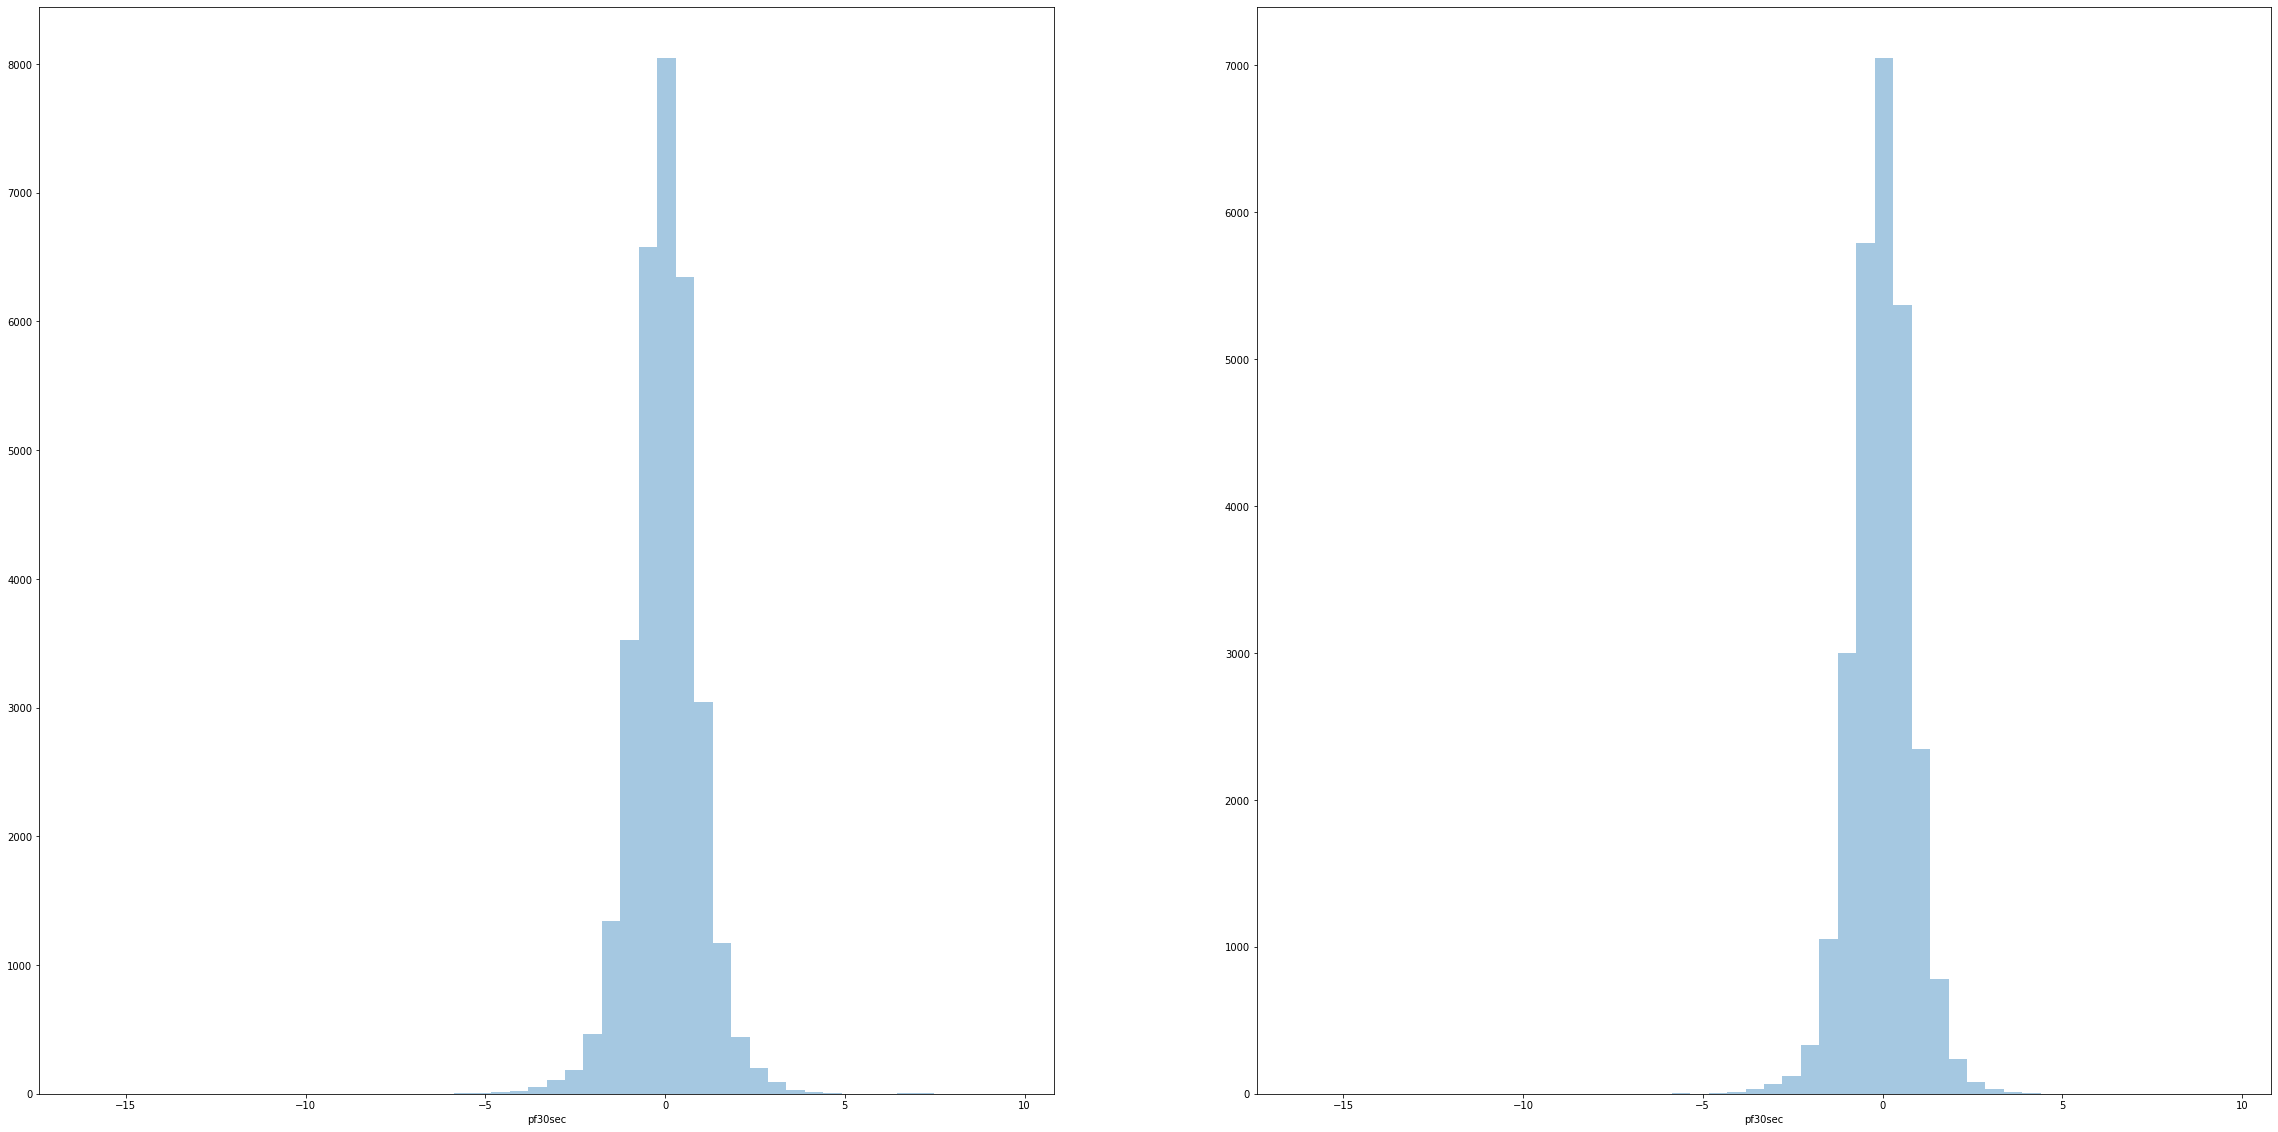

In [16]:
a4_dims = (40,20)
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=a4_dims)
sns.distplot(df.pf30sec, kde=False, ax=axes[0])
sns.distplot(data.pf30sec, kde=False, ax=axes[1])
plt.show()

In [46]:
df[df.TradeDay==6]

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,dev,jump,up,down,stdv,mu,t,pf10sec,pf30sec,pfmin
65521,2005.3,2006.6,2005.3,2006.6,2006.12,21,2020-12-23 18:00:05,18,0,5,23,6,1.3,1.3,False,False,0.258418,0.900000,1.547882,-0.88,-0.68,0.28
65522,2006.3,2007.2,2006.1,2006.3,2006.67,21,2020-12-23 18:00:10,18,0,10,23,6,0.0,1.1,False,False,0.257081,0.883333,-3.436018,-1.22,-1.82,-0.18
65524,2005.5,2005.5,2005.1,2005.1,2005.24,7,2020-12-23 18:00:20,18,0,20,23,6,-0.4,0.4,False,False,0.261736,0.883333,-4.903162,0.49,0.16,1.26
65525,2005.3,2005.6,2005.3,2005.6,2005.45,2,2020-12-23 18:00:25,18,0,25,23,6,0.3,0.3,False,False,0.256767,0.883333,-2.271838,-0.05,1.05,1.41
65528,2006.0,2006.0,2005.5,2005.5,2005.73,4,2020-12-23 18:00:40,18,0,40,23,6,-0.5,0.5,False,False,0.264527,0.883333,-5.229458,-0.29,0.92,1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79355,2000.9,2000.9,2000.8,2000.8,2000.84,5,2020-12-24 13:12:55,13,12,55,24,6,-0.1,0.1,False,False,0.370051,0.933333,-2.792407,-0.48,0.00,0.00
79365,2001.6,2001.8,2001.6,2001.8,2001.70,4,2020-12-24 13:13:45,13,13,45,24,6,0.2,0.2,False,False,0.365129,0.933333,-2.008422,-1.60,0.00,0.00
79369,2000.5,2000.5,2000.3,2000.3,2000.36,7,2020-12-24 13:14:05,13,14,5,24,6,-0.2,0.2,False,False,0.365674,0.933333,-3.099299,0.64,0.00,0.00
79370,2000.3,2000.3,2000.0,2000.0,2000.10,6,2020-12-24 13:14:10,13,14,10,24,6,-0.3,0.3,False,False,0.367216,0.933333,-3.358606,0.00,0.00,0.00


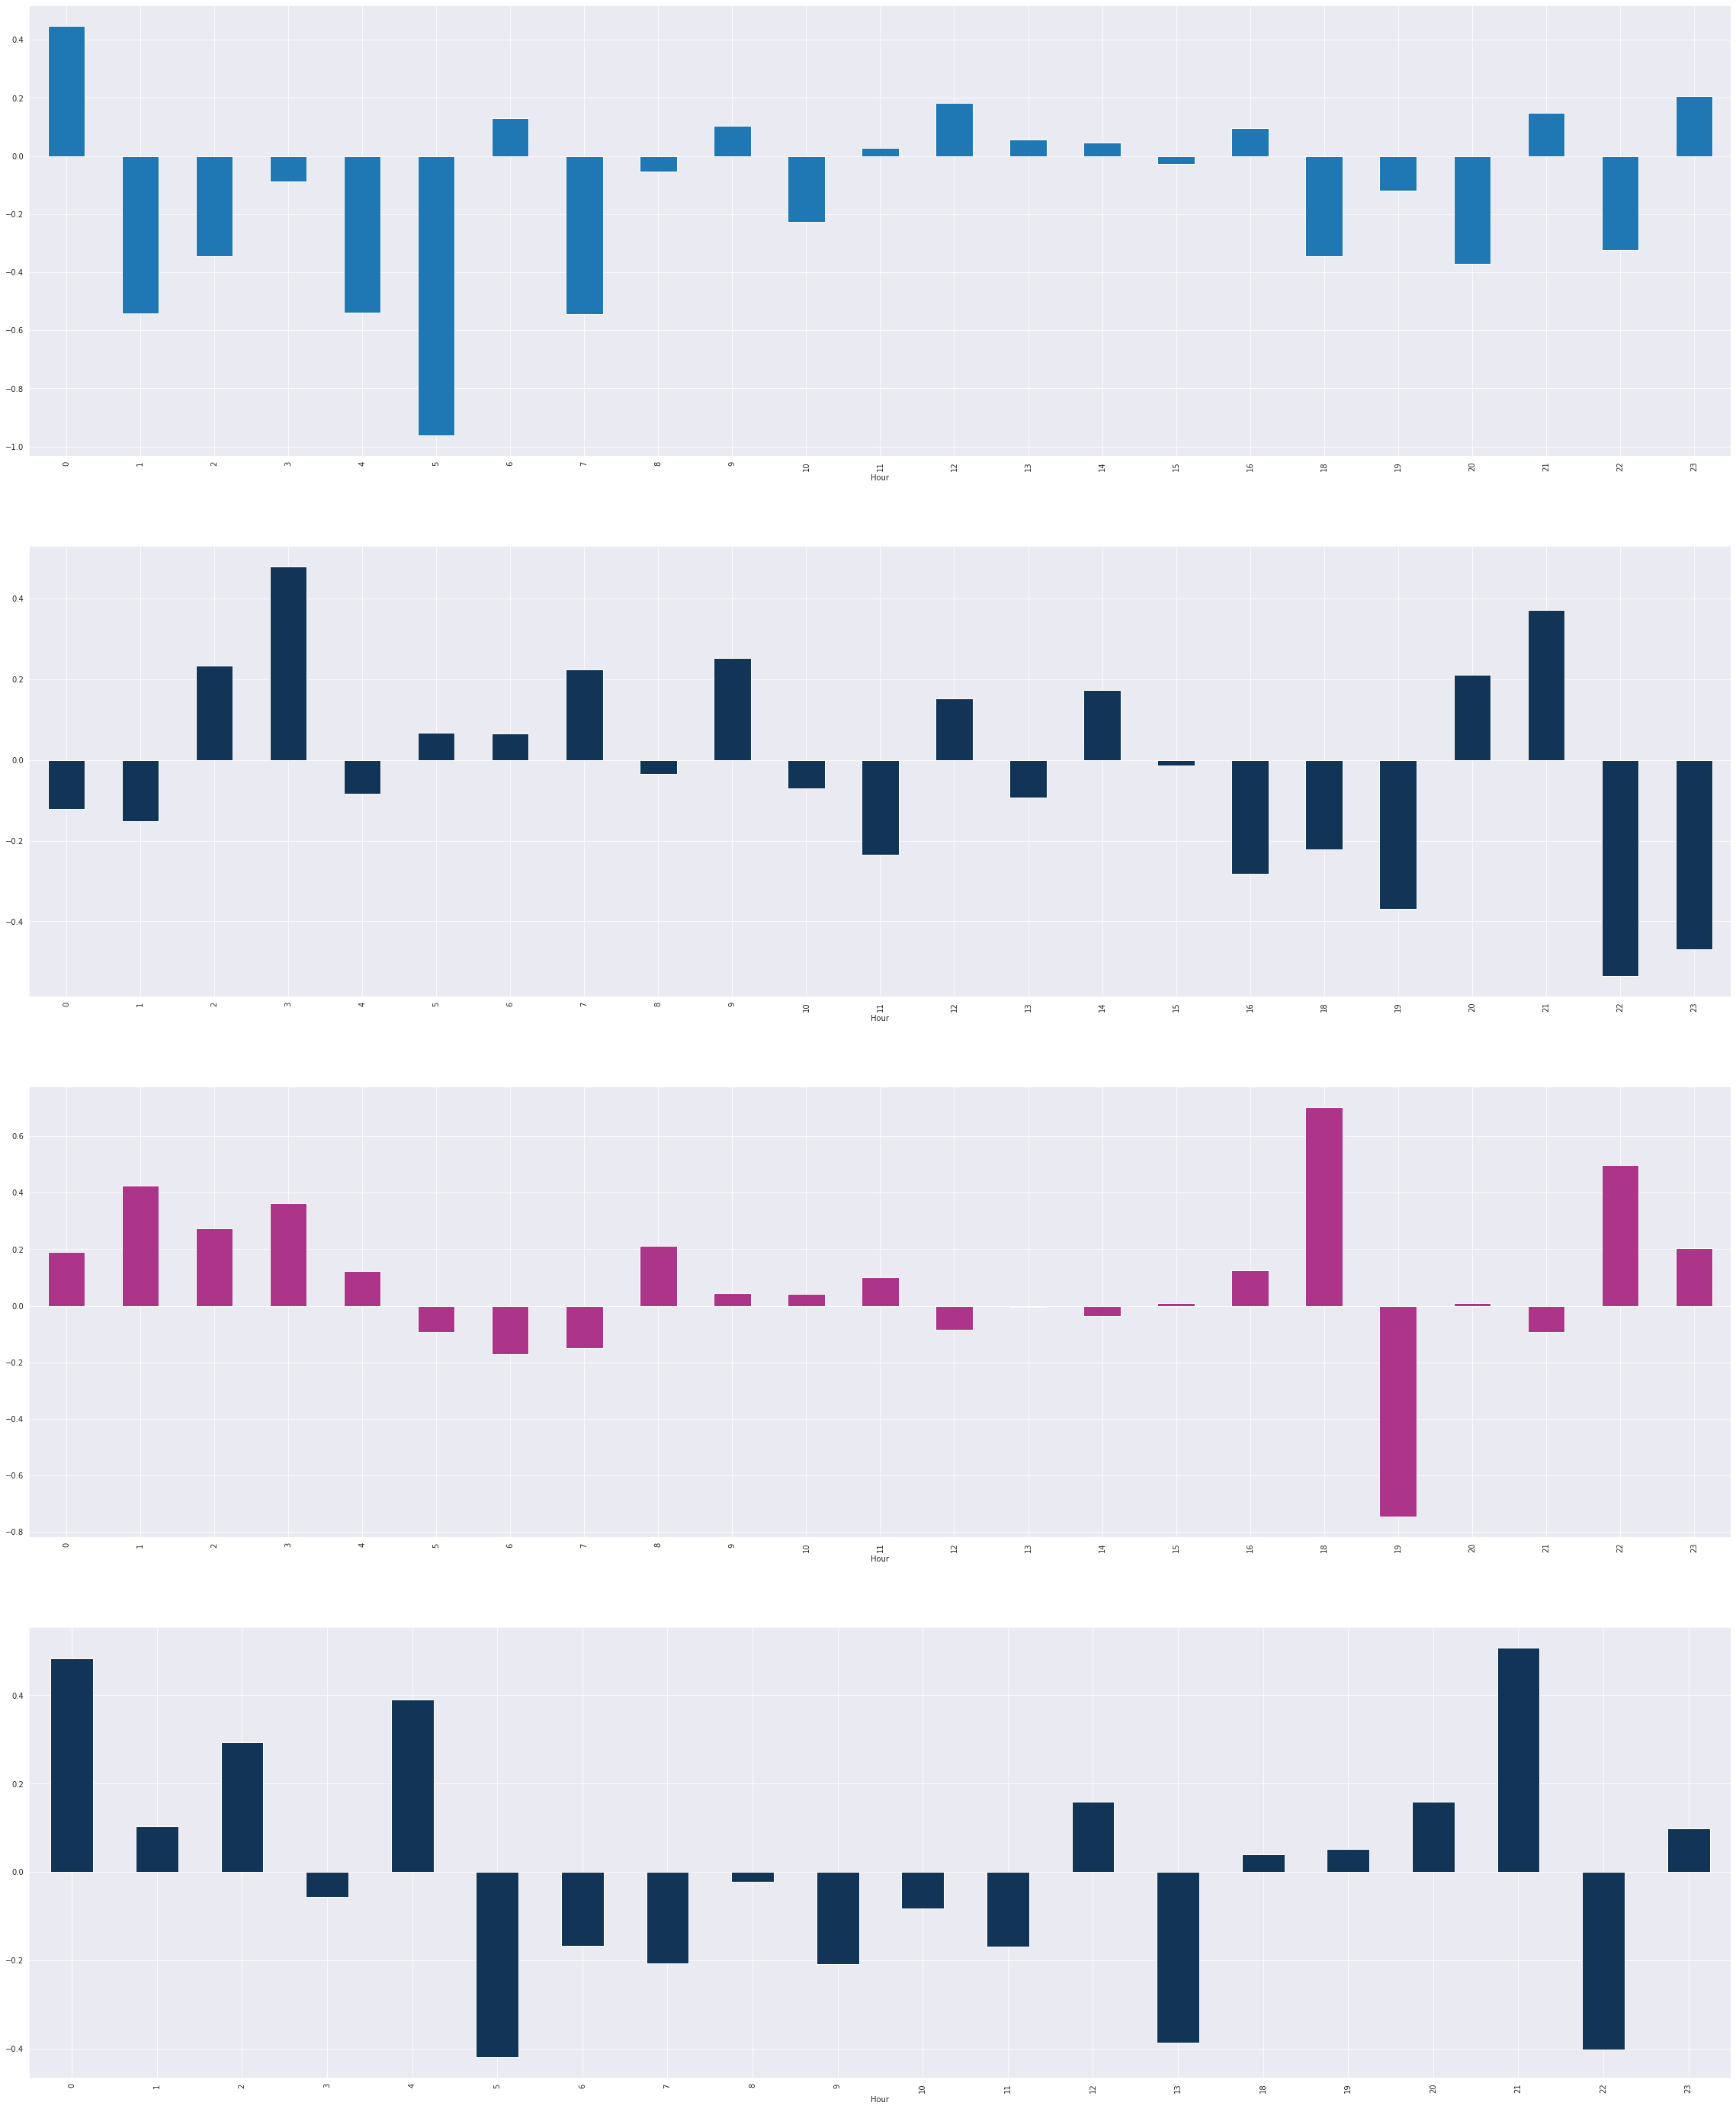

In [47]:
a4_dims = (40,50)
fig, axes = plt.subplots(nrows=4,ncols=1,figsize=a4_dims)
df[(df.t <-2) & (df.TradeDay==3)].groupby(df.Hour)["pfmin"].mean().plot(kind="bar", ax=axes[0])
df[(df.t <-2) & (df.TradeDay==4)].groupby(df.Hour)["pfmin"].mean().plot(kind="bar", ax=axes[1], color="#123456")
df[(df.t <-2) & (df.TradeDay==5)].groupby(df.Hour)["pfmin"].mean().plot(kind="bar", ax=axes[2], color="#ac3489")
df[(df.t <-2) & (df.TradeDay==6)].groupby(df.Hour)["pfmin"].mean().plot(kind="bar", ax=axes[3], color="#123456")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


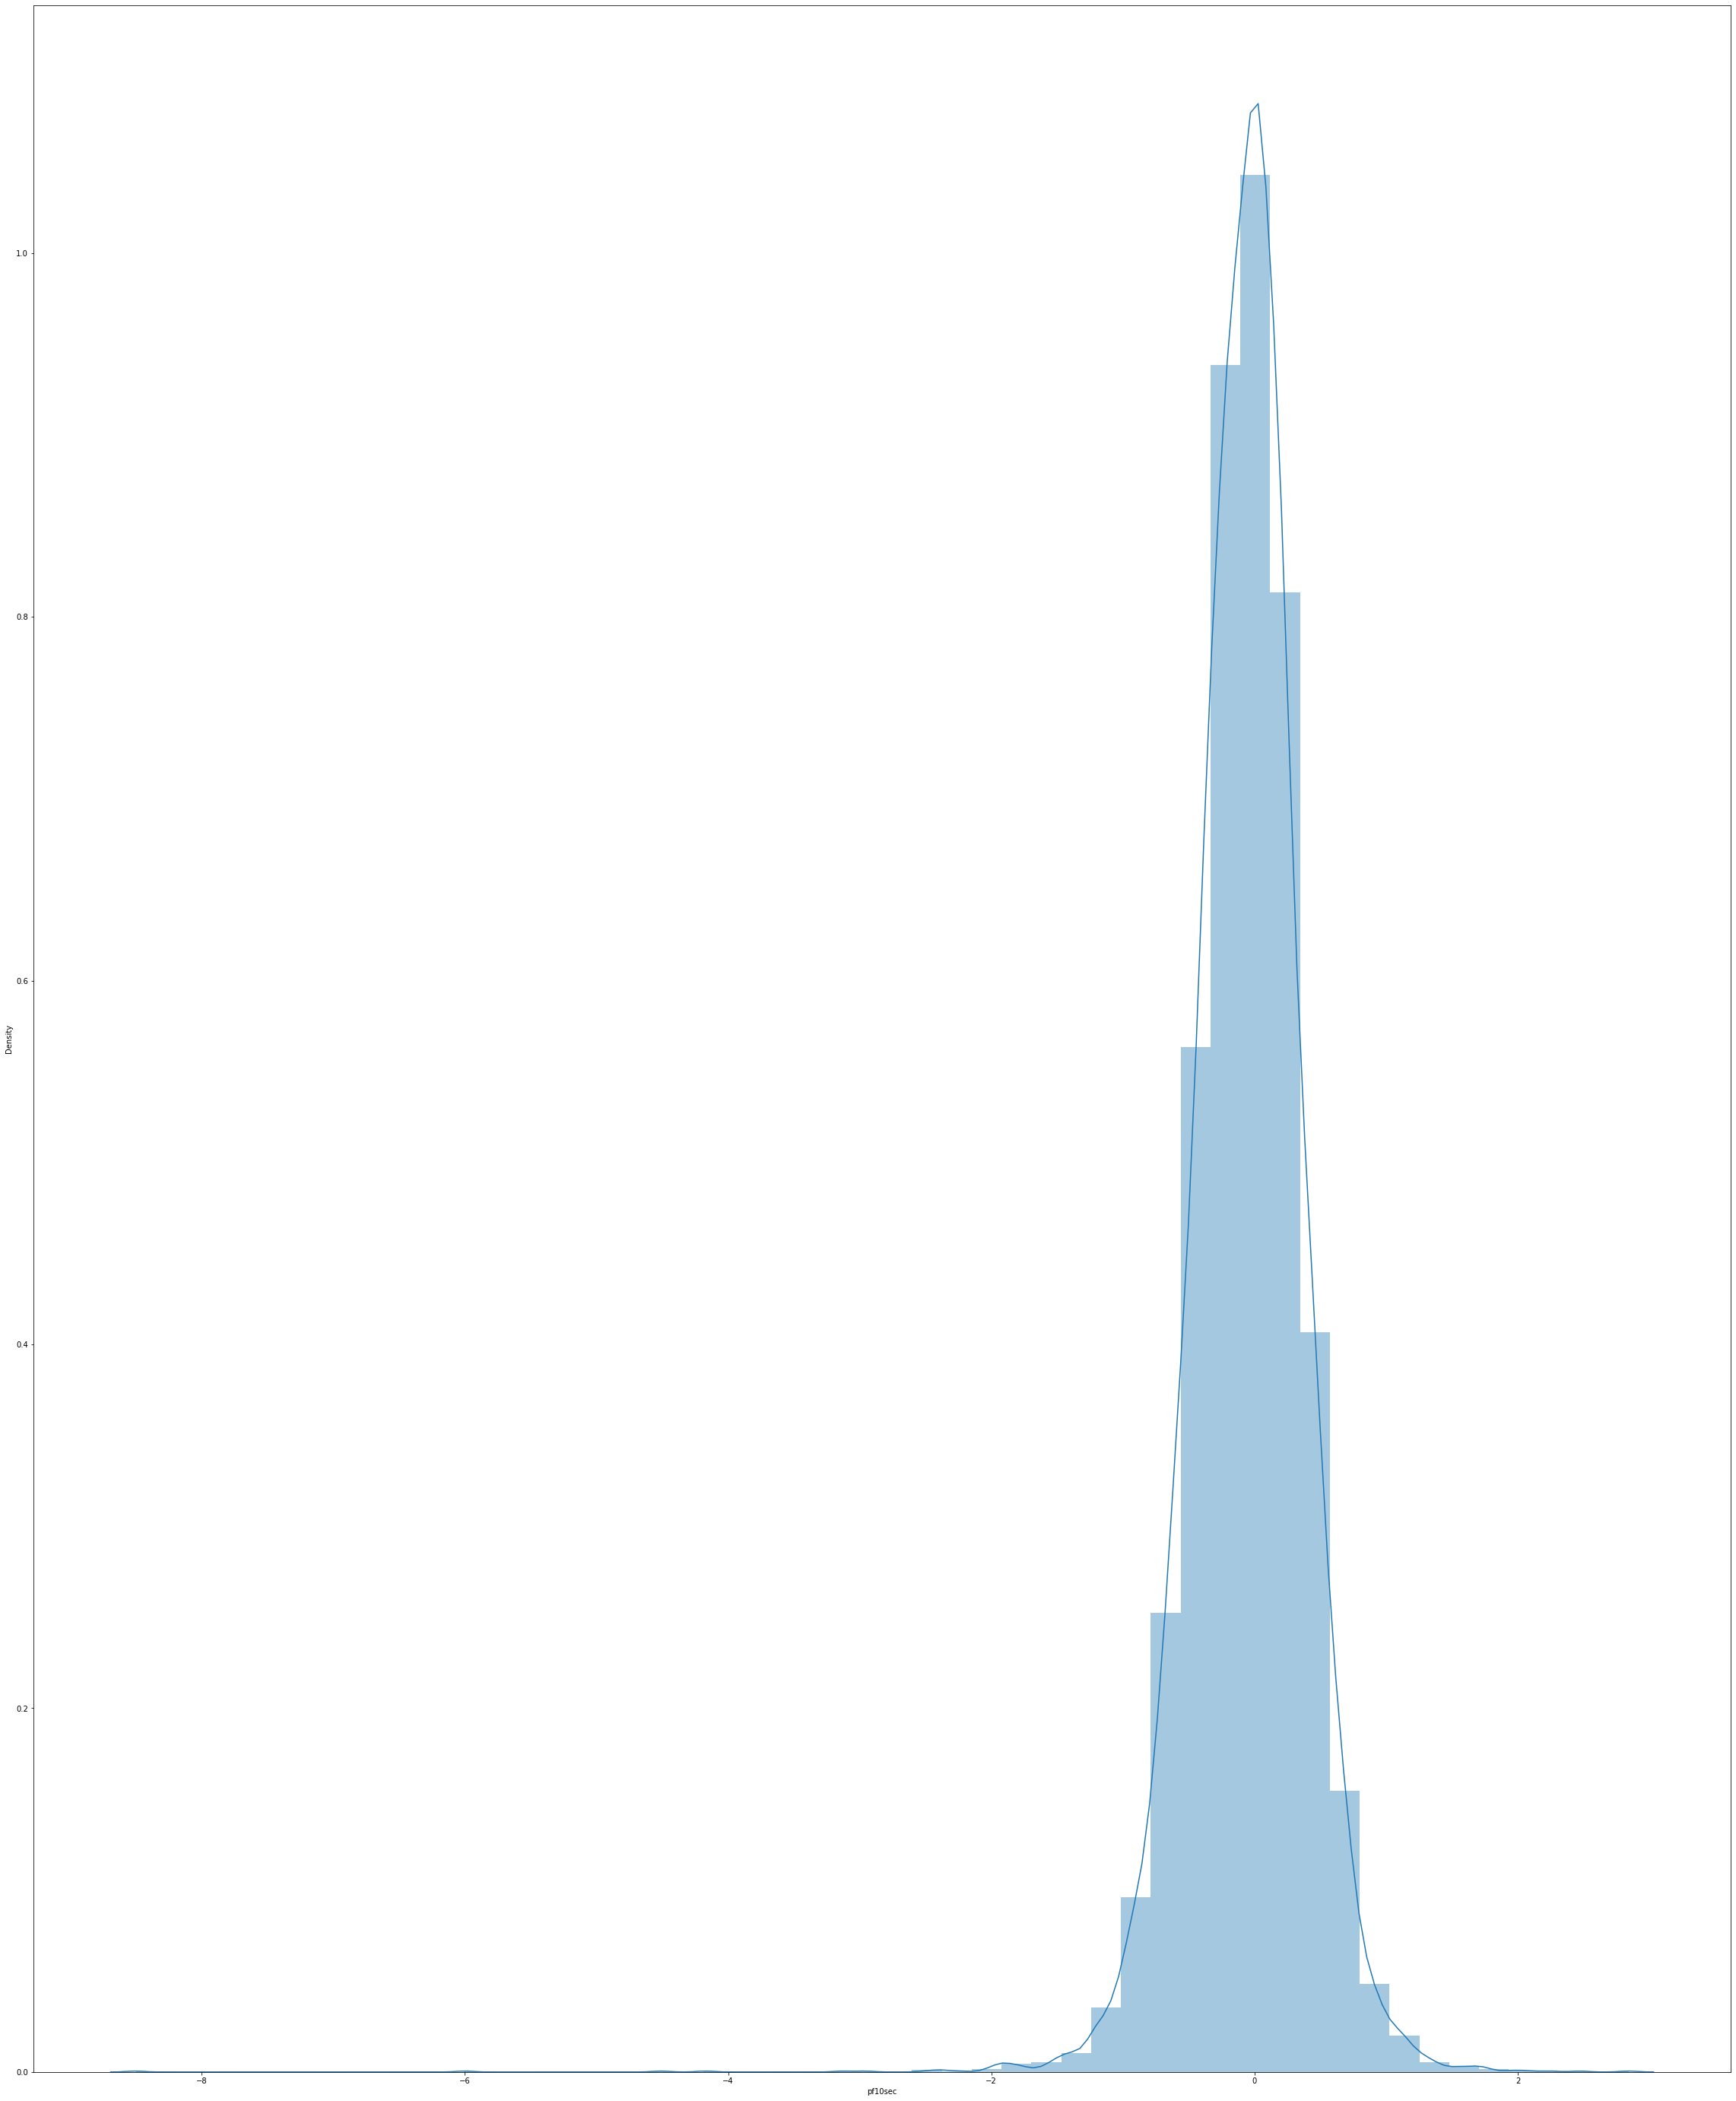

In [22]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df[(df.t<-4) | (df.TradeDay==1)]["pf10sec"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


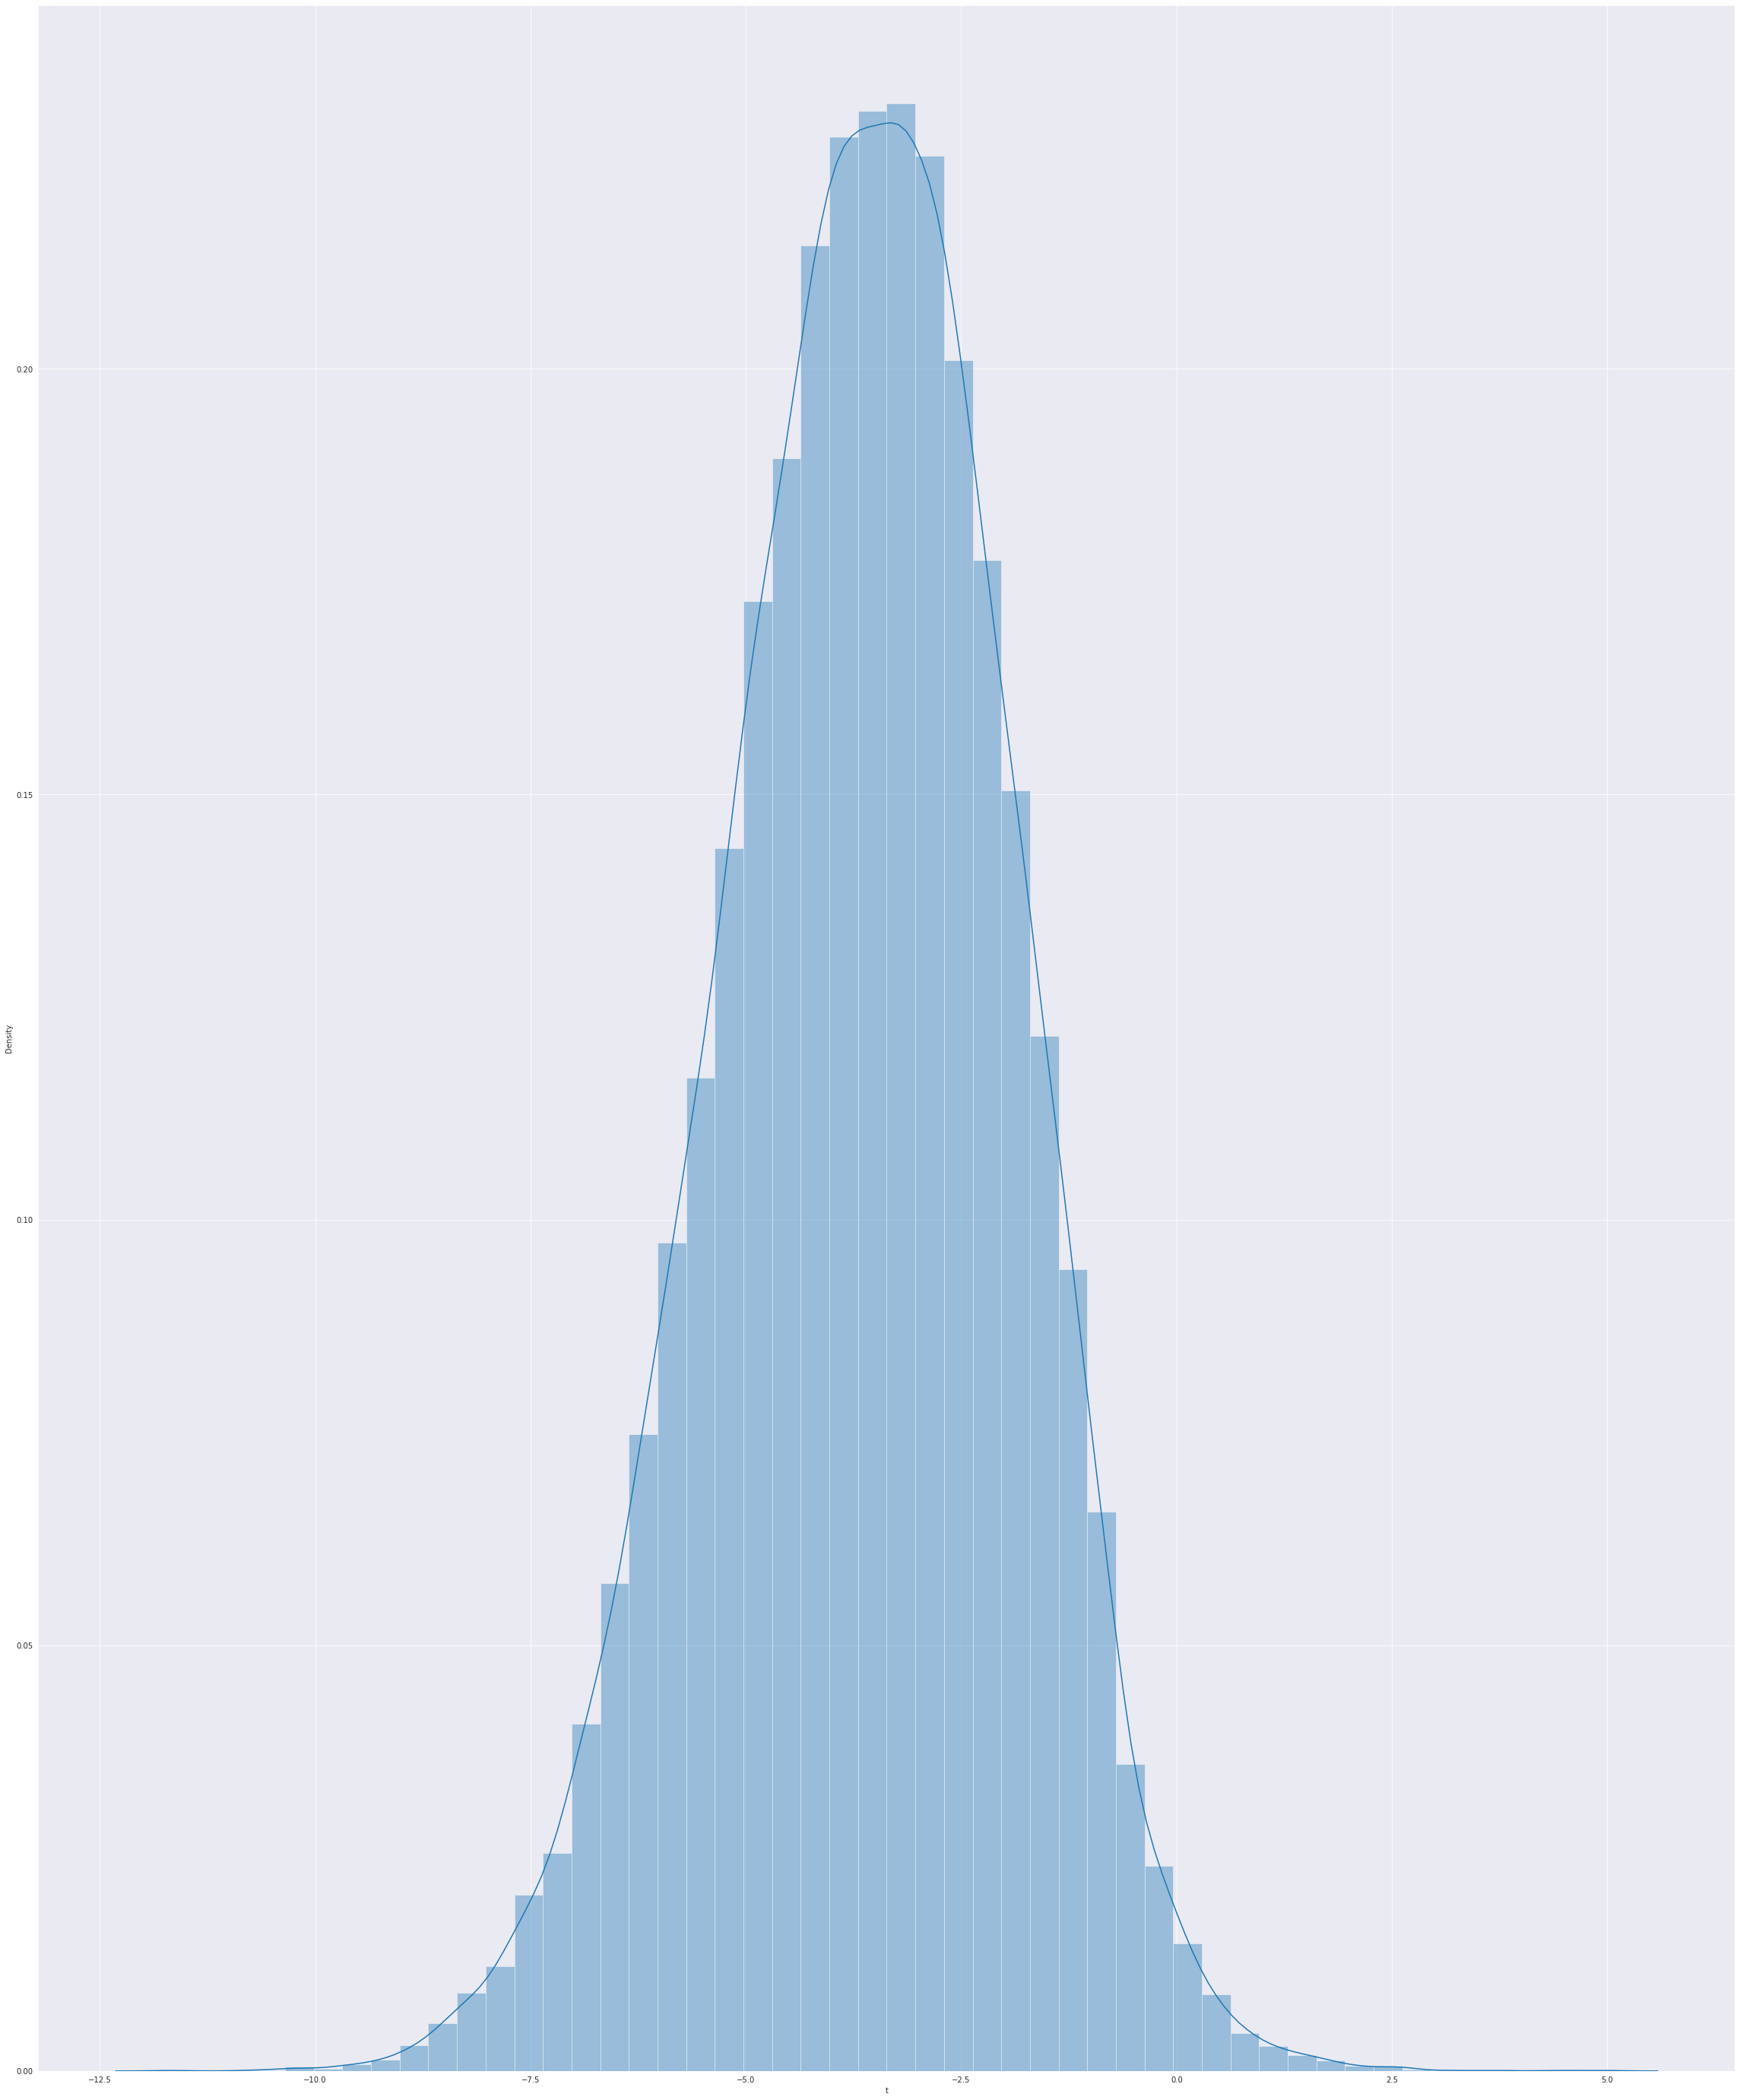

In [27]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df.t)

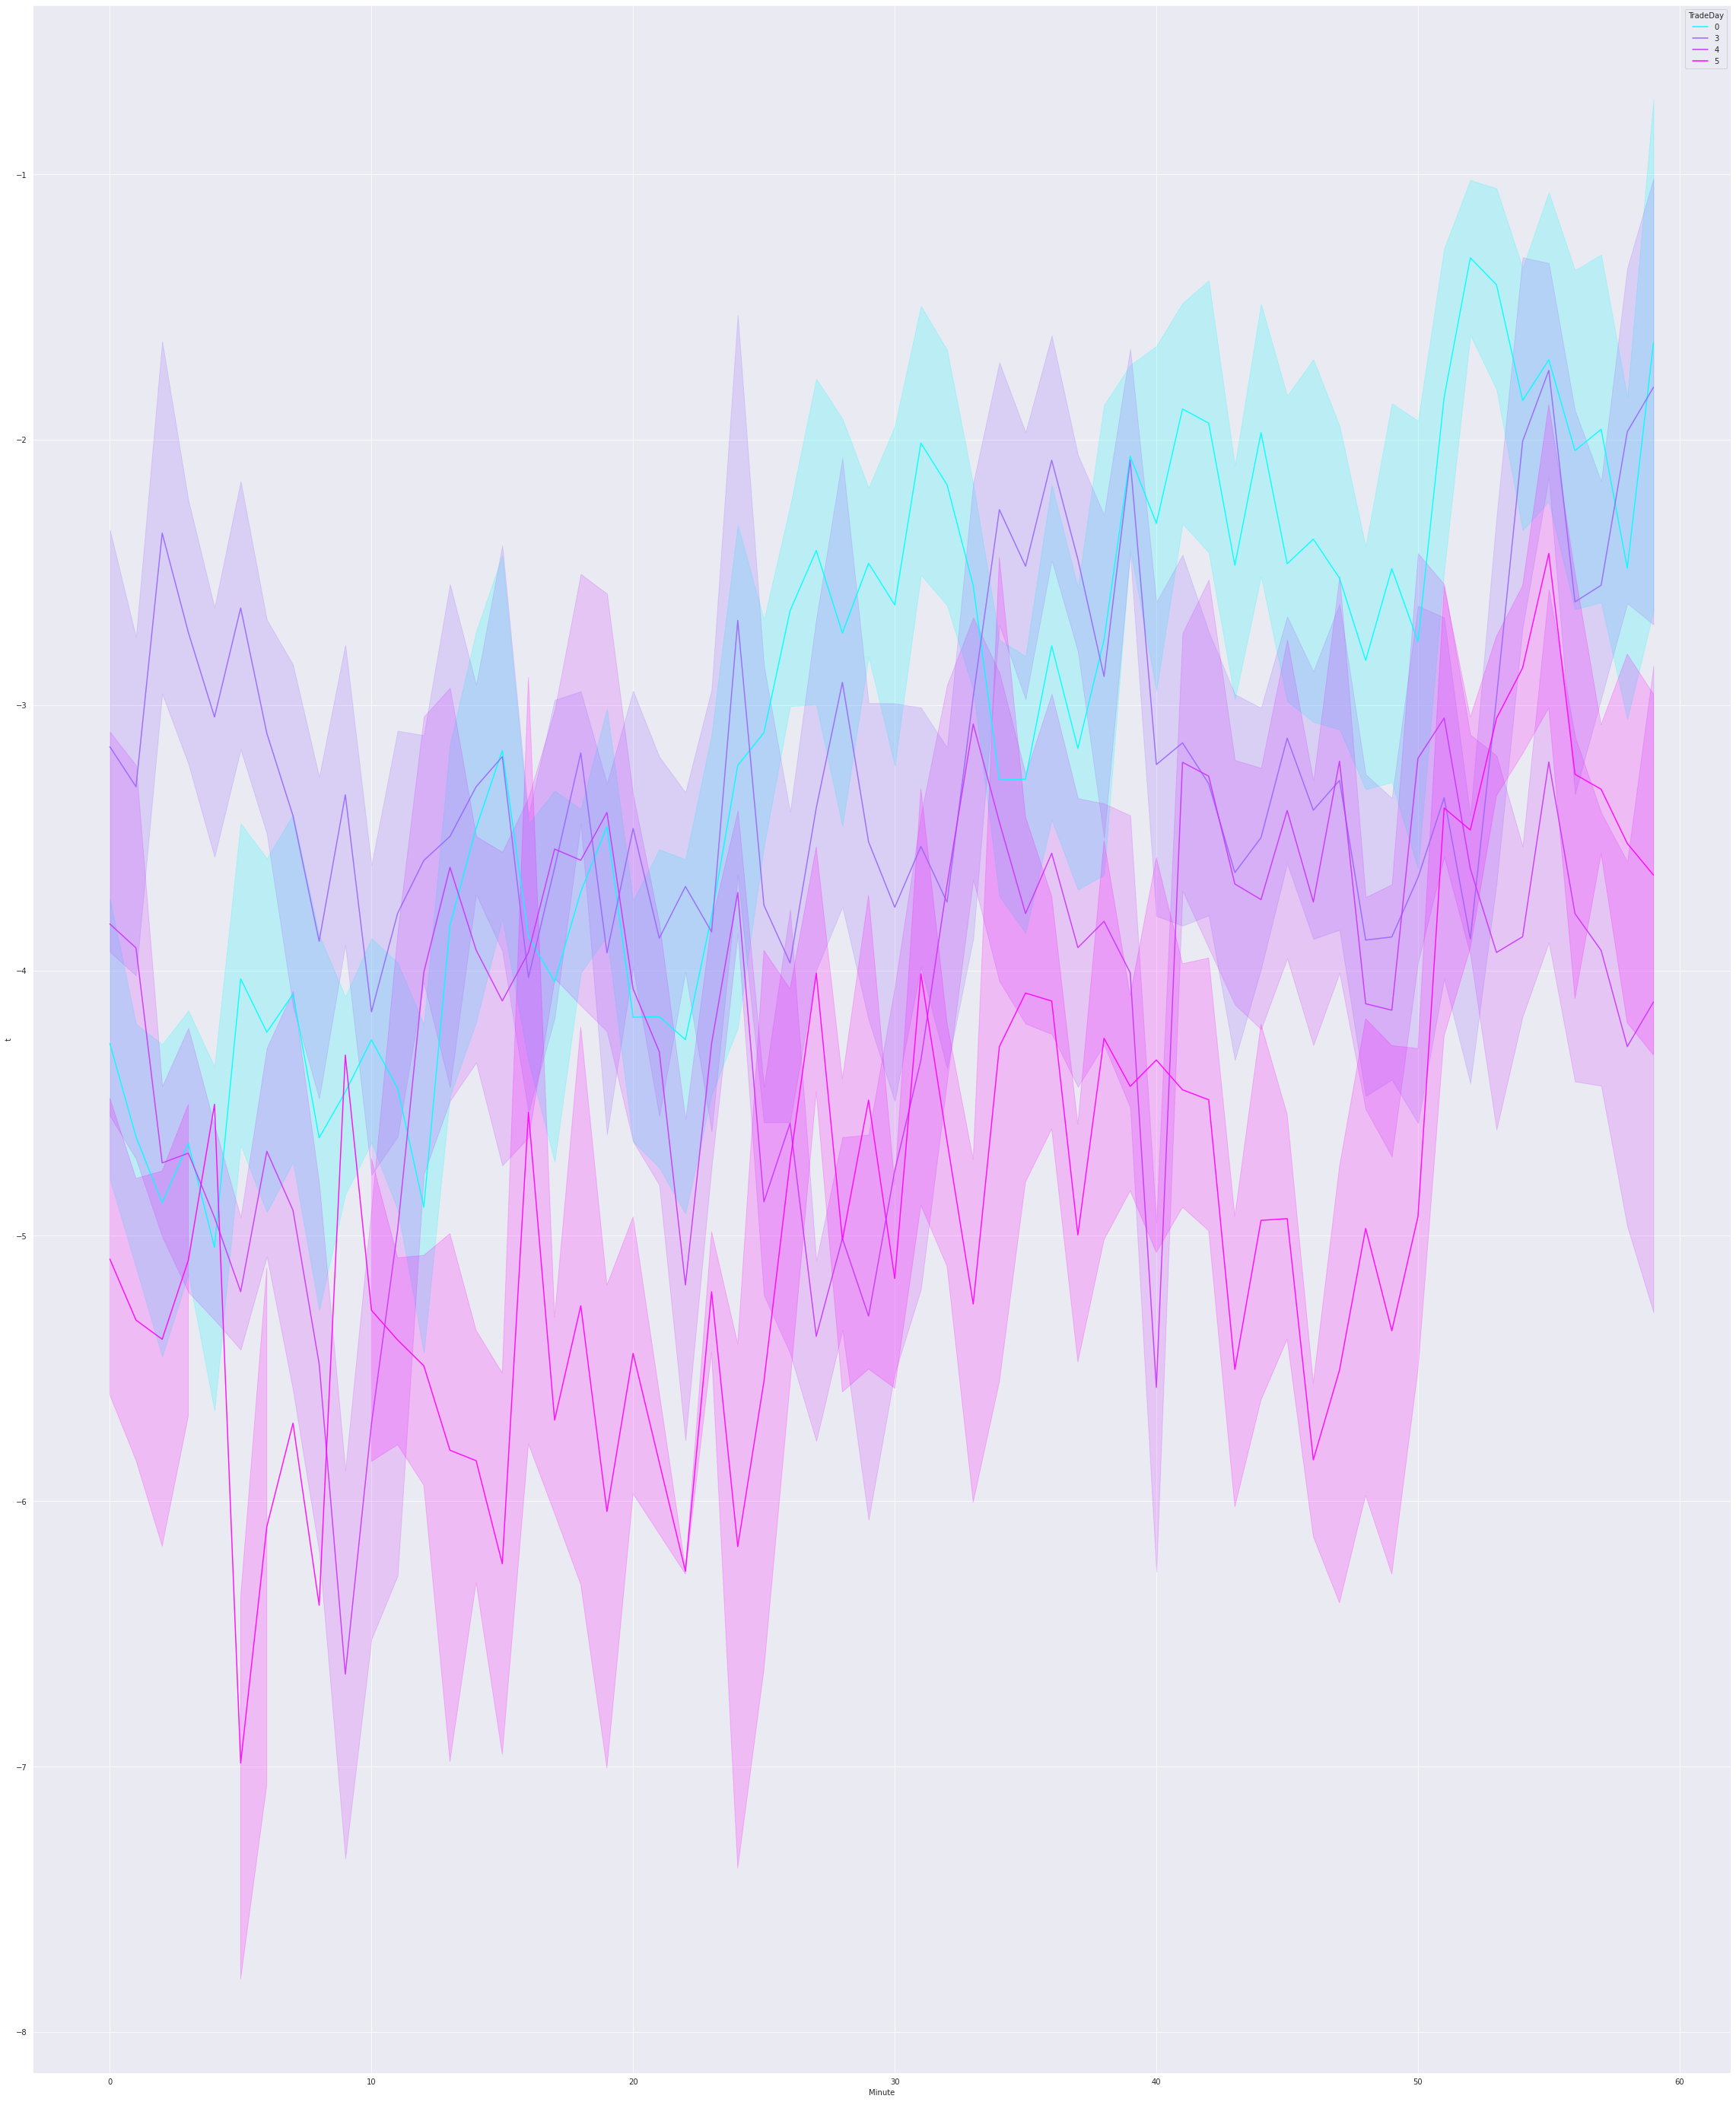

In [24]:
data=df[df.Hour==15]
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x=data.Minute, y=data.t, hue=data.TradeDay, palette="cool", dashes=False, alpha=0.9)

In [25]:
df[abs(df.stdv)==0.0].groupby(df.Hour)["stdv"].count()


Series([], Name: stdv, dtype: int64)

In [ ]:
for index, row in df.iterrows():
  if row["t_val24"] > 2:
    print(row["avg"])